# Data in a Nueral Network
- Using Torch's Built-in Vision Dataset
- basically cheating to use built-in data

### Importance of Data
**Most time will be spent:**
- getting data
- prepping data
- formating/converting data to work with nueral network
- batching

- torchvision's dataset is already prepared 

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

## Training data vs Testing Data

**must use different datasets**
- keep separate

in order to *validate* your model, you have to have *out-of-sample* testing data.
- this is data that has never been seen before
- if machine learns to *overfit data*, it will perform very well with *in-sample* data, but terribly with new data
- with millions+ tunable paramaters in a nueral network, if you train your model for to long, it can start to overfit data

- need to know what stats to watch and how long to train



## Iterating over a dataset

- can be tedious
- when get used to syntax, iteration should become easier
- (EX:) could write custom transforms

In [3]:
train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

9913344it [00:02, 4144506.43it/s]                             


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



29696it [00:00, 7292391.78it/s]          


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



1649664it [00:00, 4123114.55it/s]                            


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



5120it [00:00, 14212333.87it/s]         

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!



/home/devel/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Batches of data and Comments on this Specific Dataset - Preparing data for a model

- this is a VERY small dataset (abt 116mb)
- this definitely fits in ram, and any common gpu 
- could pass dataset through model in one go

>

- the above facts are very impractical when upscaling datasets
- massive datasets are where deep learning shines
- batches are used to iterate through chunks of items in a dataset so can fit in memory

>

- this is why GPUs with more cuda cores and more ram are favorable
- cuda cores = processing capability
- ram = batch size 

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True) # iterating through 10 items at a time
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True) # a common batch size is anywhere from 8-64 (people like to use base 8 numbers for fun)
# batch sizes and nuerons per layer are really trial and error

## Batch Sizes and Shuffling - Passing data through a model

- there are millions+ weights to create a path to desired outcome 
- model optimizes these wieghts with data
- if you pass the whole dataset at once, the machine may learn some generalizations, but will also figure out some wieghts are arbitrary
- machine has no way to know if something is gernally true or if it is just true in sample data
- optimizations through using passing batches, things that are genrally true tend to stick around, and *overfitment cases* tend to get erased
>
- you dont want to have the biggest batch size possible, there is normally a sweet spot
- you do want batch size to be big, data iteration with larger datasets will be quicker, but it comes down to trial and error
>
- the name of the game is **finding generalizations**
- passing data through a model in series is more likely to result in the model utilizing generalizations that occur towards the end of a dataset
- shuffling data while passing it through a model helps combat this, and helps the model to find generalizations in the entire dataset
> 
- if there is a quicker route to get to decreasing loss, the model will take that route
- have to constantly think about how one can obfuscate overfitment


## Iterating over our specific dataset

- iterates over specified batch
- 10 examples of handwritten digits & 10 tensors of the actual output

In [6]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x, y = data[0][0], data[1][0]

print(y)

tensor(3)


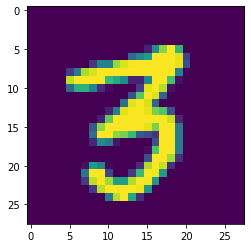

In [12]:
import matplotlib.pyplot as plt

#plt.imshow(data[0][0]) - This is not a valid image for graphing (see below)
plt.imshow(data[0][0].view(28,28))
plt.show()

**Example of Pytorch's Shaping usage**

- if imported this image, and converted to gray scale, it would be a [28, 28], not a [1, 28, 28]
- pytorch wants the 1 in front, which a hurdle and why one needs to pay attention for when one wants to feed into a nueral network

In [11]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


## Balancing Data

- the model looks for the shortest path to decrease loss
- the model doesnt know what the lowest loss could be beforehand
>
- as the optimizer is trying to decrease loss, it does not know how good it can get
- its just trying to decrease loss as fast and as easy as possible
>
- loss is really just measured on the output of a nueral network
- if a dataset is not balanced, model can get stuck in a hole of bias for part of a dataset
- need a balanced dataset
>
- there are ways to get around imbalanced datasets by modifying weights of specific classes when calculating loss, but this is EXTREMELY tedious
- so just used a dataset that is as balanced as possible (generally same number of occurances for variations in your data)
>
- (EX of an imbalanced dataset) (faces) 3 smiles, 15 frowns, 52 neutral
- (EX of a perfectly balanced dataset) (faces) 15 smiles, 15 frowns, 15 neutral
- (EX of a blended balance in a dataset) (faces) 14 smiles, 18 frowns, 16 neural
 

## Checking balance in our specific datset
- count the predictions from the model
- in this case, the model predicts hand-drawings as numbers
- count how many times a number was predicted from a drawing 

In [17]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [21]:
for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100}") # reorganize the prediction count and print as a percentage

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


# Data is more important than the nueral network!!!